# Feature Engineering and Modeling

### Having cleaned and explored my data, in this notebook I will prepare my features for modeling and attempt to create some models in order to predict worker attrition. 

# Importing Libraries and Data

In [656]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_roc_curve, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib

In [508]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [428]:
len(df)

1470

# Feature Engineering

### In the following cells I prepare my cleaned data for modeling by dividing it into training and validation sets, encoding categorical features, and scaling numerical features.

In [509]:
df.drop('Attrition', axis = 1).select_dtypes('object')

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,Laboratory Technician,Very High,Married,Y,No,Excellent,High,Better
1466,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Healthcare Representative,Low,Married,Y,No,Excellent,Low,Better
1467,Travel_Rarely,Research & Development,Bacheolor,Life Sciences,Medium,Male,Very High,Manufacturing Director,Medium,Married,Y,Yes,Outstanding,Medium,Better
1468,Travel_Frequently,Sales,Bacheolor,Medical,Very High,Male,Medium,Sales Executive,Medium,Married,Y,No,Excellent,Very High,Good


In [510]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

 #### Note: The data set has less than a fifth of attrition cases compared to non attrition cases.

### Encoding Categorical Features

In [511]:
# Dividing the data into the features variables (X) and outcome variable (Y)
X = pd.get_dummies(df.drop('Attrition', axis = 1))
y = pd.get_dummies(df['Attrition'], drop_first = True)

In [512]:
y.value_counts()

Yes
0      1233
1       237
dtype: int64

I kept the yes value for the predictor y. A value of 1 indicates attrition while a value of 0 indicates non attrition

### Dividing data into Training and Validation Sets

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 4)

### Generating scalers for numeric data

In [514]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler1 = StandardScaler()
Scaler2 = MinMaxScaler()

In [519]:
scale_variables = list(X_train.select_dtypes('number').columns[1:20])

In [520]:
scale_variables

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [521]:
list(X_train.select_dtypes('number').columns[1:20])

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### In addition to the untouched X_train variable I created two scaled variables to see which one would work best with each model. X_train1 has the numerical variables scaled using a standard scaler while X_train2 is scaled using Min Max scaling.

In [522]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()
X_test1 = X_test.copy()
X_test2 = X_test.copy()

X_train1[scale_variables] = Scaler1.fit_transform(X_train[scale_variables])
X_test1[scale_variables] = Scaler1.transform(X_test[scale_variables])

X_train2[scale_variables] = Scaler2.fit_transform(X_train[scale_variables])
X_test2[scale_variables] = Scaler2.transform(X_test[scale_variables])

# Modeling:

### Now that my data is prepared for modeling, I begin by experimenting with a logistic regression model with no modifications.

# Logistic Regression Models

## Logistic Regression 1

In [523]:
from sklearn.linear_model import LogisticRegression

In [717]:
lr1 = LogisticRegression(max_iter = 6600)
lr1.fit(X_train, y_train.values.ravel())
train_predict1 = lr1.predict(X_train)
lr_pred1 = lr1.predict(X_test)
print(confusion_matrix(y_test.values.ravel(),lr_pred1))

[[299   9]
 [ 31  29]]


In [525]:
# Actual Values
y_test.value_counts()

Yes
0      308
1       60
dtype: int64

In [526]:
# Predicted Values
pd.DataFrame(y_pred1).value_counts()

0    367
1      1
dtype: int64

I compared the predicted value counts and the actual value counts in order to clarify first confusion matrix. The top left corner denotes the number of correct non attrition predictions (307). The top right row indicates the number of non attrition cases incorrectly classified as attrition (1). The bottom left corner indicates the number of attrition cases incorrectly identified as non attrition. Lastly, the bottom right corner indicates the number of attrition cases correclty identified as attrition (0). 

In [527]:
print(classification_report(y_test,lr_pred1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.70      0.83      0.76       368



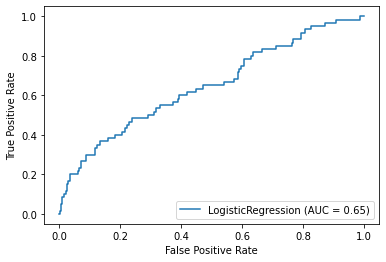

In [528]:
plot_roc_curve(model1, X_test, y_test)

The above classification report indicates that the model has an overall accuracy of .83. Although this seems high a model could achieve a higher accuracy score simply by classifying every entry as non attrition. Furthermore the model fails to predict asingle case of attrition which is demonstrated by the precision, recall, and f1-scores all equaling 0. The ROC curve below plots the trade off between true positives and false positives as we increase the models sensitivity to predicting a positive value. The low AUC of .65 indicates that the model trade's off a significant increase in False positives in order to get a higher rate of true positives. Higher AUC values will indicate a more valuable tradeoff and thus a better model. 

## LR 1 Results: 
## F1 Score: 0 AUC: .65

[[302   6]
 [ 35  25]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       308
           1       0.81      0.42      0.55        60

    accuracy                           0.89       368
   macro avg       0.85      0.70      0.74       368
weighted avg       0.88      0.89      0.87       368



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


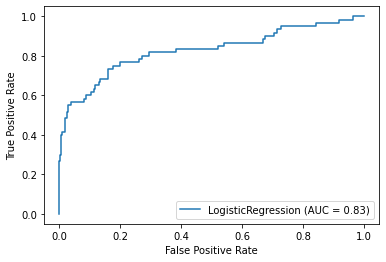

In [760]:
### TESTING796 05-2-2021
lrT = LogisticRegression(max_iter = 6600)
lrT.fit(X_train2, y_train)
train_predictT = lrT.predict(X_train2)
lr_predT = lrT.predict(X_test2)
print(confusion_matrix(y_test,lr_predT))
print(classification_report(y_test, lr_predT))
plot_roc_curve(lrT, X_test2, y_test)

## LR 1.5 Results: 
## F1 Score: .58 AUC: .83

### Using the min max scaled numerical values in order to train the Logistic Regression significantly increased the AUC and F1 scores.

## Logistic Regression 2

[[244  64]
 [ 13  47]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       308
           1       0.42      0.78      0.55        60

    accuracy                           0.79       368
   macro avg       0.69      0.79      0.71       368
weighted avg       0.86      0.79      0.81       368



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


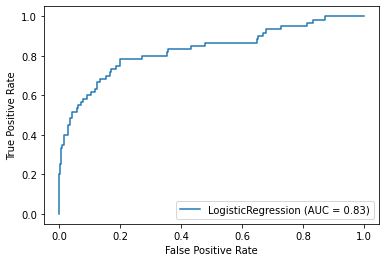

In [744]:
lr2 = LogisticRegression(class_weight = 'balanced', max_iter = 6600)
lr2.fit(X_train2, y_train)
train_predict2= lr2.predict(X_train2)
lr_pred2= lr2.predict(X_test2)
print(confusion_matrix(y_test,lr_pred2))
print(classification_report(y_test,lr_pred2))
plot_roc_curve(lr2, X_test2, y_test)

# LR 2 Results: 
## F1 Score: 0.51 AUC = .82

### By equalizing the class weights I punished the model more in each case where it incorrectly classified a case of attrition. This is meant to combat data imbalance. Although the F1 score and AUC values are comparable to the last model, 43 of the 60 attrition cases are correctly identified compared to the 28 in LR model 1.5.

# Logistic Regression 3 and 4

### With the following models I attepmt a couple methods for finding the best hyper parameters to see if I can develop an even more accurate model.

In [249]:
# This function graphs changes in auc score with changes in a single hyper parameter.
def hyper_parameter_visual(model,general_parameters,adjusted_param, adjusted_param_vals, X_train, X_test, y_train, y_test):
    
    train_values = []
    test_values = []
    
    for val in adjusted_param_vals:
        general_parameters[adjusted_param] = val
        model.set_params(** general_parameters)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_values.append(roc_auc)
        
        
        y_pred = model.predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_values.append(roc_auc)
        
    
    plt.plot(adjusted_param_vals, train_values, c = 'b')
    plt.plot(adjusted_param_vals, test_values, c = 'r')
    plt.ylabel('score')
    plt.xlabel('parameter value')

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

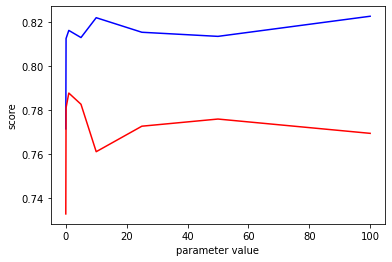

In [532]:
hyper_parameter_visual(lr2, {}, 'C', [.01, .1, 1,5,10,25,50,100], X_train2, X_test2, y_train.values.ravel(), y_test.values.ravel())

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

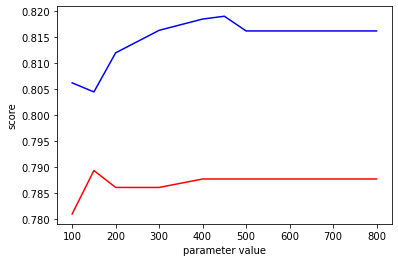

In [533]:
hyper_parameter_visual(lr2, {'C' : 1}, 'max_iter', [100, 150, 200, 300, 400, 450, 500, 800], X_train2, X_test2, y_train.values.ravel(), y_test.values.ravel())

[[244  64]
 [ 13  47]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       308
           1       0.42      0.78      0.55        60

    accuracy                           0.79       368
   macro avg       0.69      0.79      0.71       368
weighted avg       0.86      0.79      0.81       368



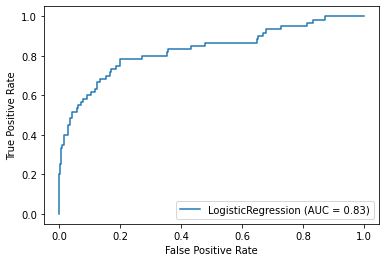

In [758]:
lr3 = LogisticRegression(class_weight = 'balanced', C  = 1, max_iter = 6600)
lr3.fit(X_train2, y_train.values.ravel())
train_predict2= lr3.predict(X_train2)
lr_pred3= lr3.predict(X_test2)
print(confusion_matrix(y_test,lr_pred3))
print(classification_report(y_test,lr_pred3))
plot_roc_curve(lr3, X_test2, y_test)

In [ ]:
lr_params = {'max_iter' : [100, 150, 200, 300, 400, 450, 500, 800], 'C' : [100, 10, 1.0, 0.1, 0.01]}

In [536]:
lr_params = {'max_iter' : [100, 150, 200, 300, 400, 450, 500, 800], 'C' : [100, 10, 1.0, 0.1, 0.01]}
clf4 = RandomizedSearchCV(lr2, lr_params ,n_iter = 20, cv = 5)
clf4.fit(X_train2, y_train.values.ravel())

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=1, class_weight='balanced',
                                                max_iter=800),
                   n_iter=20,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'max_iter': [100, 150, 200, 300, 400,
                                                     450, 500, 800]})

In [537]:
clf4.best_params_

{'max_iter': 450, 'C': 10}

[[242  66]
 [ 15  45]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       308
           1       0.41      0.75      0.53        60

    accuracy                           0.78       368
   macro avg       0.67      0.77      0.69       368
weighted avg       0.85      0.78      0.80       368



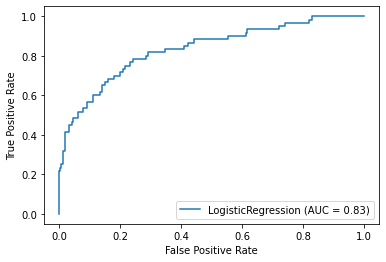

In [759]:
lr4 = LogisticRegression(class_weight = 'balanced', C  = 10, max_iter = 6600)
lr4.fit(X_train2, y_train.values.ravel())
train_predict4= lr4.predict(X_train2)
lr_pred4= lr4.predict(X_test2)
print(confusion_matrix(y_test,lr_pred4))
print(classification_report(y_test,lr_pred4))
plot_roc_curve(lr4, X_test2, y_test)

In [543]:
print('Model1: \n',confusion_matrix(y_test,lr_pred1))
print('Model2: \n',confusion_matrix(y_test,lr_pred2))
print('Model3: \n',confusion_matrix(y_test,lr_pred3))
print('Model4: \n',confusion_matrix(y_test,lr_pred4))

Model1: 
 [[307   1]
 [ 60   0]]
Model2: 
 [[242  66]
 [ 17  43]]
Model3: 
 [[245  63]
 [ 13  47]]
Model4: 
 [[247  61]
 [ 14  46]]


The tuned models have a slight increase in F1 and AUC scores. As the hyperparemeters are tuned the models seem maintain the same range of correctly predicted Attrition cases while properly classifying more non attrition cases.

# LR 3/4 Results: 
## F1 Score: 0.55 AUC = .83

# Random Forest Models

# Random Forest 1

[[305   3]
 [ 51   9]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.75      0.15      0.25        60

    accuracy                           0.85       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.84      0.85      0.81       368



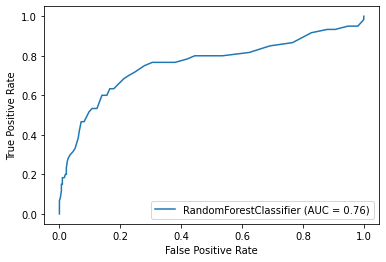

In [548]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train.values.ravel())
train_predict2 = rf1.predict(X_train)
rf_pred1 = rf1.predict(X_test)
print(confusion_matrix(y_test,rf_pred1))
print(classification_report(y_test,rf_pred1))
plot_roc_curve(rf1, X_test, y_test)

The first random forest model had an f1 score of .25 and an AUC of .76. The model mostly predicted non attrition cases and was not useful for predicting attrition.

# RF 1 Results: 
## F1 Score: 0.25     AUC: .76

In [219]:
# sklearn.utils.class

# Random Forest 2

[[307   1]
 [ 52   8]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       308
           1       0.89      0.13      0.23        60

    accuracy                           0.86       368
   macro avg       0.87      0.57      0.58       368
weighted avg       0.86      0.86      0.81       368



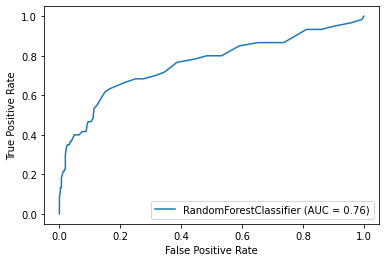

In [550]:
rf2 = RandomForestClassifier(class_weight = 'balanced')
rf2.fit(X_train, y_train.values.ravel())
train_predict3 = rf2.predict(X_train)
rf_pred2 = rf2.predict(X_test)
print(confusion_matrix(y_test,rf_pred2))
print(classification_report(y_test,rf_pred2))
plot_roc_curve(rf2, X_test, y_test)

### Balancing the data seemed to have little effect on the model results

# RF 2 Results: 
## F1 Score: 0.23     AUC: .76

C:\Users\Allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[306   2]
 [ 53   7]]


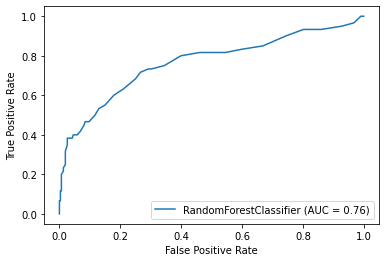

In [470]:
# Test
rfT = RandomForestClassifier(class_weight = 'balanced')
rfT.fit(X_train2, y_train)
train_predictT = rfT.predict(X_train2)
rf_predT = rfT.predict(X_test2)
print(confusion_matrix(y_test,rf_predT))
plot_roc_curve(rfT, X_test2, y_test)

# Random Forest 3

I'll start modifying the parameters by running a Grid Search of several parameters. I'll then choose the parameters to ellicit the best results in order to run a new model. 

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
param_grid = {'bootstrap': [True],
 'max_depth': [5, 10, 20, 30, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200, 400]}

clf = GridSearchCV(model3, param_grid, cv = 5)


In [231]:
clf = GridSearchCV(model3, param_grid, cv = 5)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=3, min_samples_leaf=5,
                                              n_estimators=1200),
             param_grid={'bootstrap': [True],
                         'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 400]})

In [232]:
clf.cv_results_

{'mean_fit_time': array([0.06760979, 0.13223724, 0.25983562, 0.51867075, 0.0670608 ,
        0.13111906, 0.25843649, 0.51620607, 0.06606011, 0.12971768,
        0.25783391, 0.51189933, 0.06626019, 0.1295176 , 0.25723352,
        0.51526742, 0.06626005, 0.13091884, 0.25883484, 0.51546764,
        0.06646008, 0.13011813, 0.25843277, 0.51887116, 0.06666055,
        0.12971978, 0.2548327 , 0.51186252, 0.06585979, 0.12911906,
        0.25603242, 0.50926018, 0.06565957, 0.12871885, 0.2556304 ,
        0.50986066, 0.07871823, 0.15534086, 0.30715795, 0.61015348,
        0.07626719, 0.15013814, 0.29747024, 0.5919374 , 0.07506967,
        0.14653249, 0.29026332, 0.58106308, 0.07646937, 0.14933567,
        0.29646902, 0.59433765, 0.07626925, 0.14953375, 0.29506969,
        0.58913665, 0.07406321, 0.14533195, 0.28846579, 0.57604742,
        0.07486796, 0.1449316 , 0.28966465, 0.57552218, 0.07446747,
        0.1449317 , 0.28726263, 0.57271957, 0.07346663, 0.14433279,
        0.28806157, 0.57291656,

In [233]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

[[299   9]
 [ 42  18]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       308
           1       0.67      0.30      0.41        60

    accuracy                           0.86       368
   macro avg       0.77      0.64      0.67       368
weighted avg       0.84      0.86      0.84       368



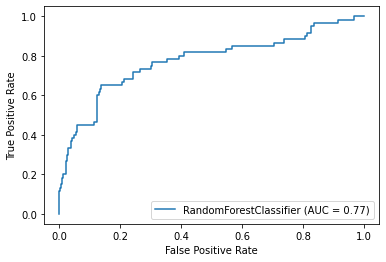

In [551]:
rf3 = RandomForestClassifier(class_weight = 'balanced', bootstrap = True,
 max_depth = 20,
 max_features = 'auto',
 min_samples_leaf =  4,
 min_samples_split =  10,
 n_estimators = 100)
rf3.fit(X_train, y_train.values.ravel())
train_predict4 = rf3.predict(X_train)
y_pred4 = rf3.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test, y_pred4))
plot_roc_curve(rf3, X_test, y_test)

# RF3 Results: 
## F1 Score: 0.395  AUC: .77

### This model had less cases of false negatives and an about equal number of true positives and false positives. My next model will repeat the same process except I will use a randomized search in order to search a broader number of parameter values.

# Random Forest 4

In [238]:
random_params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [239]:
from sklearn.model_selection import RandomizedSearchCV

In [240]:
clf1 = RandomizedSearchCV(model3, random_params ,n_iter = 20, cv = 5)
clf1.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=3,
                                                    min_samples_leaf=5,
                                                    n_estimators=1200),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         18

In [241]:
clf1.cv_results_

{'mean_fit_time': array([0.35261602, 0.91809354, 1.6173799 , 2.38837118, 0.32654095,
        3.47690625, 1.86062536, 2.68363643, 1.62386999, 1.82494822,
        1.22592387, 2.06915784, 1.92555418, 1.36456466, 1.61816769,
        2.68331332, 1.83212571, 0.65639582, 1.77589288, 2.04448528]),
 'std_fit_time': array([0.0202189 , 0.00710514, 0.01452192, 0.01102411, 0.002961  ,
        0.03565662, 0.02698323, 0.01021374, 0.01513407, 0.01465504,
        0.01319306, 0.02023425, 0.0264261 , 0.02325478, 0.02703215,
        0.01486034, 0.01572339, 0.00725634, 0.01148697, 0.01714452]),
 'mean_score_time': array([0.01720276, 0.04625072, 0.07686491, 0.11830754, 0.01708565,
        0.16775241, 0.09108272, 0.13191004, 0.07684045, 0.09048142,
        0.0608561 , 0.10679951, 0.09586339, 0.06346045, 0.07647061,
        0.14273443, 0.10067654, 0.03202901, 0.08847008, 0.09457436]),
 'std_score_time': array([3.74960911e-04, 3.96306147e-04, 7.40572095e-04, 1.16725074e-03,
        2.25795088e-04, 1.89229898e-

In [242]:
clf1.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

[[305   3]
 [ 50  10]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.77      0.17      0.27        60

    accuracy                           0.86       368
   macro avg       0.81      0.58      0.60       368
weighted avg       0.84      0.86      0.81       368



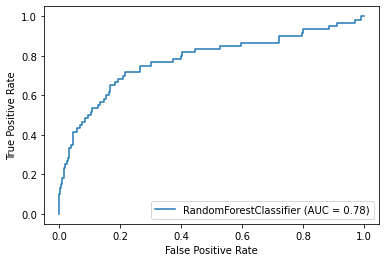

In [552]:
rf4 = RandomForestClassifier(class_weight = 'balanced', bootstrap = True,
 max_depth = None,
 max_features = 'auto',
 min_samples_leaf =  1,
 min_samples_split =  5,
 n_estimators = 1800)
rf4.fit(X_train, y_train.values.ravel())
train_predict5 = rf4.predict(X_train)
rf_pred4 = rf4.predict(X_test)
print(confusion_matrix(y_test,rf_pred4))
print(classification_report(y_test, rf_pred4))
plot_roc_curve(rf4, X_test, y_test)

# RF 4 Results: 
## F1 Score: 0.297 AUC: 78

# Random Forest 5

### A max depth of None likely leads to over fitting so I'm going to try several different values for max depth Number of estimators might also be too large.

In [247]:
clf2 = GridSearchCV(model5, {'max_depth': [1,2,3,5,7,10,15]}, cv = 5)
clf2.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=5,
                                              n_estimators=1800),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10, 15]})

In [248]:
clf2.cv_results_

{'mean_fit_time': array([1.81736207, 1.94442921, 2.06110249, 2.31913223, 2.54273772,
        2.70988193, 2.76030092]),
 'std_fit_time': array([0.00671287, 0.02094085, 0.00483588, 0.00374212, 0.02310733,
        0.01913199, 0.03408881]),
 'mean_score_time': array([0.10974021, 0.11164713, 0.12469807, 0.12007141, 0.12771726,
        0.14427514, 0.13467302]),
 'std_score_time': array([2.23914020e-03, 1.00487871e-03, 2.12305324e-02, 7.88516241e-05,
        1.74808807e-03, 2.14712390e-02, 1.34644912e-03]),
 'param_max_depth': masked_array(data=[1, 2, 3, 5, 7, 10, 15],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 10},
  {'max_depth': 15}],
 'split0_test_score': array([0.75113122, 0.76470588, 0.78733032, 0.84615385, 0.85972851,
        0.86425339, 0.85520362]),
 'split1_test_score': array([0.77

In [250]:
test_values = [range(10)]
print(test_values)

[range(0, 10)]


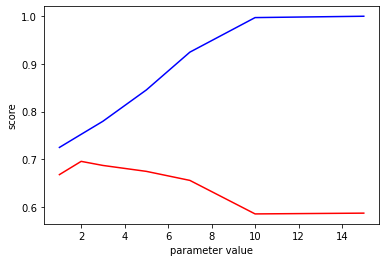

In [251]:
hyper_parameter_visual(rf2, clf1.best_params_, 'max_depth', [1, 2, 3, 5, 7, 10, 15], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

Indicates a max depth of two or three is most informative.

In [252]:
random_params1 = {'bootstrap': [True, False],
 'max_depth': [2,3],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [253]:
clf3 = RandomizedSearchCV(model3, random_params1 ,n_iter = 20, cv = 5)

In [254]:
clf3.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=15,
                                                    max_features='sqrt',
                                                    min_samples_split=5,
                                                    n_estimators=800),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [255]:
clf3.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 3,
 'bootstrap': True}

In [256]:
random_params_test = {'bootstrap': True,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

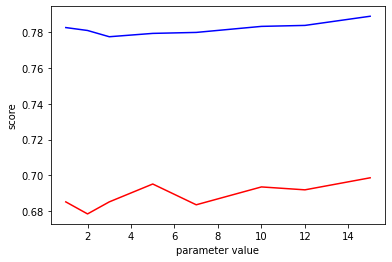

In [257]:
hyper_parameter_visual(rf2, random_params2, 'min_samples_leaf', [1, 2, 3, 5, 7, 10,12, 15], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

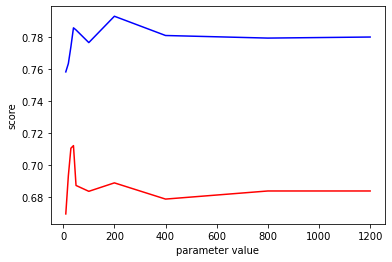

In [258]:
hyper_parameter_visual(rf2, random_params_test, 'n_estimators', [10,20,30,40,50, 100, 200, 400, 800,1200], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

[[263  45]
 [ 28  32]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       308
           1       0.42      0.53      0.47        60

    accuracy                           0.80       368
   macro avg       0.66      0.69      0.67       368
weighted avg       0.82      0.80      0.81       368



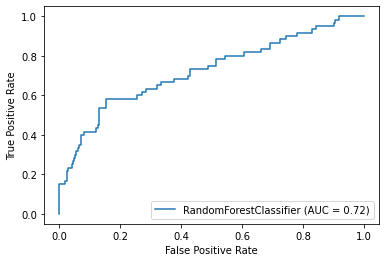

In [553]:
rf5 = RandomForestClassifier(class_weight = 'balanced', bootstrap = True,
 max_depth = 3,
 max_features = 'auto',
 min_samples_leaf =  5,
 min_samples_split =  2,
 n_estimators = 30)
rf5.fit(X_train, y_train.values.ravel())
train_predict6 = rf5.predict(X_train)
rf_pred5 = rf5.predict(X_test)
print(confusion_matrix(y_test, rf_pred5))
print(classification_report(y_test, rf_pred5))
plot_roc_curve(rf5, X_test, y_test)

This randomforest has a lower AUC then the rest. It attempts to classify more objects as attrition cases but correctly classifies just more than half while also misclassifying a significant amount of non attrition cases.

# RF 5 Results: 
## F1 Score: 0.30 AUC = .76

# XGBoost

## XG Boost Model 1

In [317]:
import xgboost as xgb

[[304   4]
 [ 46  14]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       308
           1       0.78      0.23      0.36        60

    accuracy                           0.86       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.85      0.86      0.83       368



C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


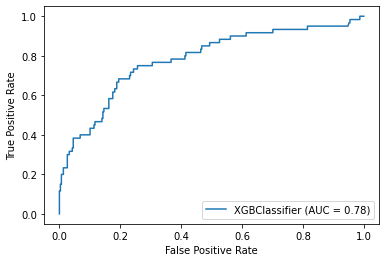

In [751]:
xgb1 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 10, use_label_encoder = False)
xgb1.fit(X_train, y_train)
xgb_pred1 = xgb1.predict(X_test)
print(confusion_matrix(y_test,xgb_pred1))
print(classification_report(y_test,xgb_pred1))
plot_roc_curve(xgb1, X_test, y_test)

In [321]:
xgb_params = {
'learning_rate' : [.01, .05, .1, .2, .3, .5, .75, 1], 
'max_depth' : [1,2,3,4,5,6,7,8,9,10],
'min_child_weight' : [1,1.5,2,5,10],
'gama' : [0, .25, .5, .75, 1],
 'subsample' : [.5,.75,1],
'colsample_bytree' : [.5,.75,1]
}

## XG Boost Model 2

### Tried random search for XGBoost

In [322]:
clf5 = RandomizedSearchCV(xgb1, xgb_params ,n_iter = 50, cv = 5)
clf5.fit(X_train, y_train.values.ravel())
print('Best params: ', clf5.best_params_)
print('Best score: ', clf5.best_score_)

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:37] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:37] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation me


[22:31:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:37] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:37] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:38] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:38] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:38] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:38] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:38] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:40] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:41] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:41] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:41] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:41] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin


[22:31:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:42] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:42] WARNING: ..\src\learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindin

### Created model with best parameters

In [324]:
clf5.best_params_

{'subsample': 1,
 'min_child_weight': 10,
 'max_depth': 8,
 'learning_rate': 0.5,
 'gama': 0,
 'colsample_bytree': 1}

In [326]:
xgb_params1 = {'subsample': 1,
 'min_child_weight': 10,
 'max_depth': 8,
 'learning_rate': 0.5,
 'gama': 0,
 'colsample_bytree': 1}

[[304   4]
 [ 46  14]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       308
           1       0.78      0.23      0.36        60

    accuracy                           0.86       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.85      0.86      0.83       368



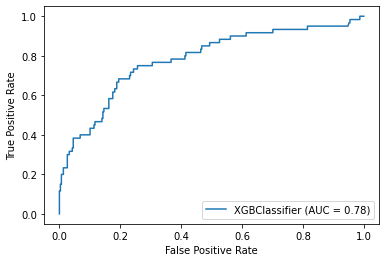

In [756]:
xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 10, params = xgb_params1, verbosity = 0, use_label_encoder = False)
xgb2.fit(X_train, y_train)
xgb_pred2 = xgb2.predict(X_test)
print(confusion_matrix(y_test,xgb_pred2))
print(classification_report(y_test,xgb_pred2))
plot_roc_curve(xgb2, X_test, y_test)

### Model no different from previous models. Will now attempt graphing changes in generalizability

## XGB Model 2 Results:
## f1 score: .36 AUC: .78

## XG Boost Model 3

In [353]:
xgb_params = {
'learning_rate' : [.01, .05, .1, .2, .3, .5, .75, 1], 
'max_depth' : [1,2,3,4,5,6,7,8,9,10],
'min_child_weight' : [1,1.5,2,5,10],
'gama' : [0, .25, .5, .75, 1],
 'subsample' : [.5,.75,1],
'colsample_bytree' : [.5,.75,1]
}

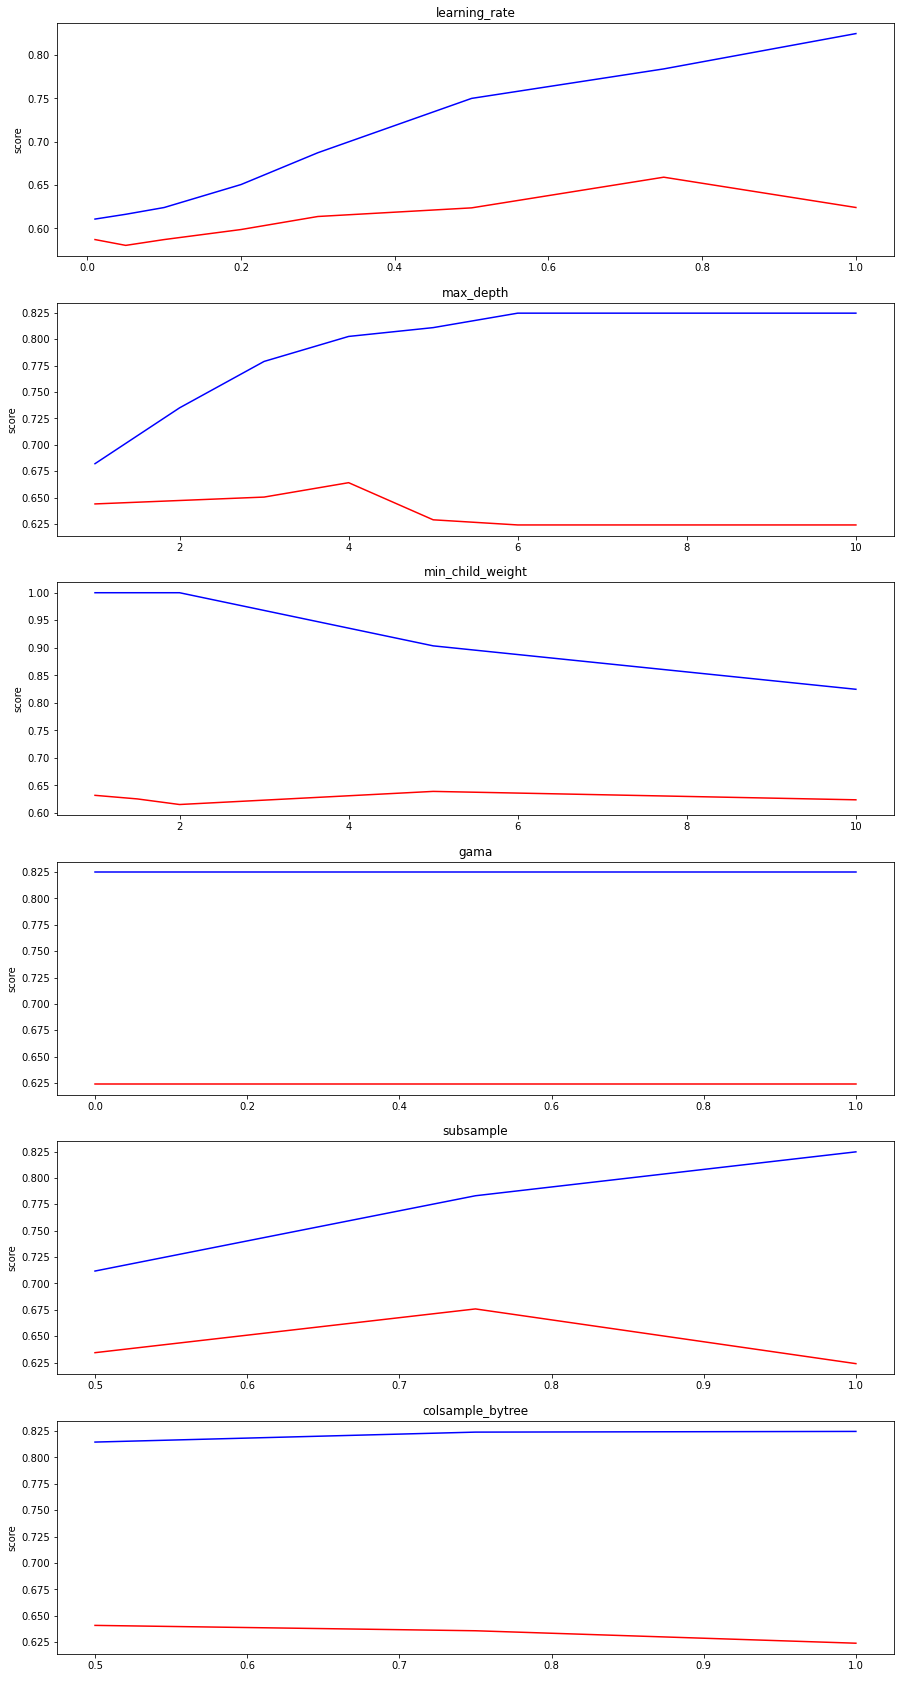

In [372]:
fig = plt.figure(figsize = (15,30))
for metric, value_list, number in zip(xgb_params.keys(), xgb_params.values(), range(1,7)):
    sub1 = fig.add_subplot(6,1,number)
    hyper_parameter_visual(xgb2, xgb_params1, metric, value_list, X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
    plt.title(metric)
    plt.xlabel(' ')

C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


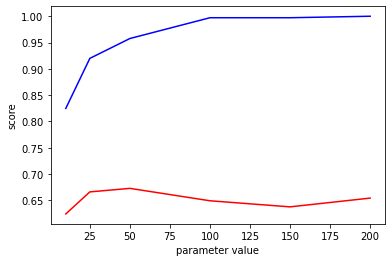

In [757]:
hyper_parameter_visual(xgb2, xgb_params1, 'n_estimators', [10,25,50,100,150,200], X_train, X_test, y_train.values.ravel(), y_test.values.ravel())


In [376]:
xgb_params2 = {'subsample': .75,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.7,
 'gama': 0,
 'colsample_bytree': .5}

[[302   6]
 [ 45  15]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       308
           1       0.71      0.25      0.37        60

    accuracy                           0.86       368
   macro avg       0.79      0.62      0.65       368
weighted avg       0.84      0.86      0.83       368



C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


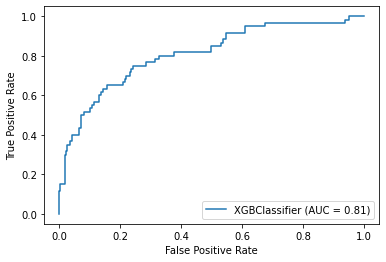

In [754]:
xgb3 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 50, params = xgb_params2, verbosity = 0, use_label_encoder = False)
xgb3.fit(X_train2, y_train)
xgb_pred3 = xgb3.predict(X_test2)
print(confusion_matrix(y_test,xgb_pred3))
print(classification_report(y_test,xgb_pred3))
plot_roc_curve(xgb3, X_test2, y_test)

## XG Boost Model 4

In [611]:
y_train.value_counts().index

MultiIndex([(0,),
            (1,)],
           names=['Yes'])

In [626]:
1 - (y_train.value_counts().loc[1] / y_train.value_counts().loc[0][0])

Yes
1      0.808649
dtype: float64

[[301   7]
 [ 43  17]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       308
           1       0.71      0.28      0.40        60

    accuracy                           0.86       368
   macro avg       0.79      0.63      0.66       368
weighted avg       0.85      0.86      0.84       368



C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


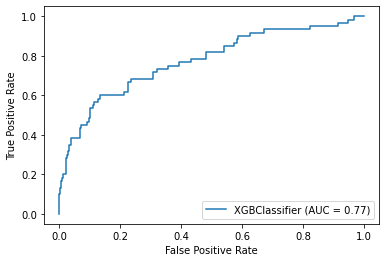

In [753]:
xgb4 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 50, params = xgb_params2, verbosity = 0, scale_pos_weight = .99, use_label_encoder = False)
xgb4.fit(X_train2, y_train)
xgb_pred4 = xgb4.predict(X_test2)
print(confusion_matrix(y_test,xgb_pred4))
print(classification_report(y_test,xgb_pred4))
plot_roc_curve(xgb4, X_test2, y_test)

## Threshold Tuning

In [718]:
probability = predicted_proba[0:,1]

### Random Forest Model 5:

0.8016304347826086
[[263  45]
 [ 28  32]]


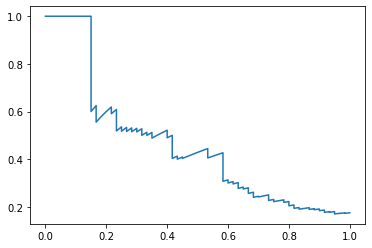

In [728]:
threshold = 0.5

predicted_proba = rf5.predict_proba(X_test)
probability = predicted_proba[0:,1]
predicted = (probability >= threshold).astype('int')

accuracy = print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
precision, recall, thresholds = precision_recall_curve(y_test, probability)
plt.plot(recall, precision)

### Random Forest Model 4:

In [669]:
y_test.values.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'to_array'

0.8559782608695652
[[305   3]
 [ 50  10]]


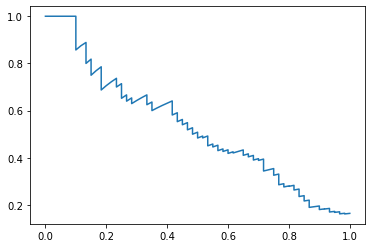

In [731]:
threshold = 0.5

predicted_proba = rf4.predict_proba(X_test)
probability = predicted_proba[0:,1]
predicted = (probability >= threshold).astype('int')

accuracy = print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
precision, recall, thresholds = precision_recall_curve(y_test, probability)
plt.plot(recall, precision)

### Logistic Regression Model 2:

0.7907608695652174
[[244  64]
 [ 13  47]]


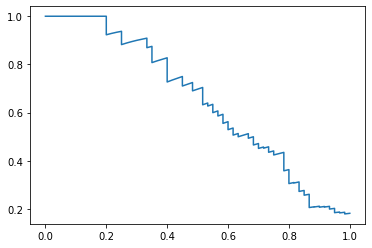

In [734]:
threshold = 0.5

predicted_proba = lr2.predict_proba(X_test2)
probability = predicted_proba[0:,1]
predicted = (probability >= threshold).astype('int')

accuracy = print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
precision, recall, thresholds = precision_recall_curve(y_test, probability)
plt.plot(recall, precision)

### Logistic Regression Model 3:

0.7934782608695652
[[245  63]
 [ 13  47]]


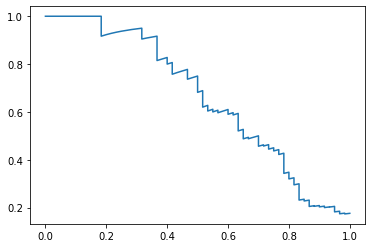

In [735]:
threshold = 0.5

predicted_proba = lr3.predict_proba(X_test2)
probability = predicted_proba[0:,1]
predicted = (probability >= threshold).astype('int')

accuracy = print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
precision, recall, thresholds = precision_recall_curve(y_test, probability)
plt.plot(recall, precision)

### XG Boost Model 3:

0.8614130434782609
[[302   6]
 [ 45  15]]


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


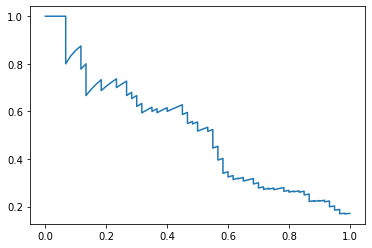

In [736]:
threshold = 0.5

predicted_proba = xgb3.predict_proba(X_test2)
probability = predicted_proba[0:,1]
predicted = (probability >= threshold).astype('int')

accuracy = print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
precision, recall, thresholds = precision_recall_curve(y_test, probability)
plt.plot(recall, precision)

### XG Boost Model 4:

0.8641304347826086
[[301   7]
 [ 43  17]]


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1.63732097e-02, 7.37319980e-03, 9.97591257e-01, 6.33131247e-03,
       1.50138596e-02, 1.82471976e-01, 1.34331977e-03, 5.09506837e-02,
       2.21378841e-02, 3.57733038e-03, 4.70661037e-02, 5.53195784e-03,
       9.11374483e-03, 1.94795668e-01, 7.04071252e-03, 1.81262940e-03,
       9.30993378e-01, 2.28048451e-02, 1.34166144e-03, 1.52299646e-03,
       6.70623546e-03, 8.70628841e-03, 1.01766204e-02, 5.73921025e-01,
       3.24702682e-03, 1.96231250e-02, 3.92680950e-02, 6.76359143e-03,
       2.45493017e-02, 3.08267791e-02, 1.17159724e-01, 1.54432410e-03,
       3.93347116e-03, 2.29685128e-01, 3.71072814e-02, 1.37581574e-02,
       1.10423248e-02, 9.29482579e-01, 1.04579441e-01, 6.71018362e-02,
       2.52329465e-03, 5.96914589e-02, 2.35611369e-04, 6.83112652e-04,
       1.91112012e-02, 1.75717275e-03, 2.85737077e-03, 3.11583966e-01,
       1.33570492e-01, 5.40907197e-02, 5.04129767e-01, 5.29955421e-03,
       3.56316045e-02, 7.42076896e-03, 9.25212924e-04, 1.28066063e-01,
      

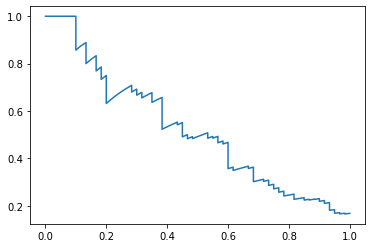

In [738]:
threshold = 0.5

predicted_proba = xgb4.predict_proba(X_test2)
probability = predicted_proba[0:,1]
predicted = (probability >= threshold).astype('int')

accuracy = print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
precision, recall, thresholds = precision_recall_curve(y_test, probability)
plt.plot(recall, precision)